In [2]:
!pip install streamlit pyngrok --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.4 MB/s eta 0:00:00


In [3]:
!pkill -f streamlit


In [4]:
!pip install streamlit

In [5]:
#project 2 Guvi internship
#Student Score Prediction Using Study Habits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

import streamlit as st


from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset (replace with your file path in Drive)
df = pd.read_csv('/content/drive/MyDrive/data/student_dataset.csv')

# Show first 5 rows
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Student_ID,Name,Class,Hours_Studied,Attendance,Assignments_Completed,Participation_Score,Final_Score
0,1,Derrick Davila,9th,10,73,1,14,80.5
1,2,Timothy Tapia,9th,10,93,0,7,68.5
2,3,David Ortiz,11th,4,90,2,10,52.6
3,4,Timothy Brock,10th,10,68,1,5,68.4
4,5,Joseph Davis,9th,9,43,8,18,74.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             100 non-null    int64  
 1   Name                   99 non-null     object 
 2   Class                  100 non-null    object 
 3   Hours_Studied          100 non-null    int64  
 4   Attendance             100 non-null    int64  
 5   Assignments_Completed  100 non-null    int64  
 6   Participation_Score    100 non-null    int64  
 7   Final_Score            100 non-null    float64
dtypes: float64(1), int64(5), object(2)
memory usage: 6.4+ KB


In [7]:
df.describe()

,Student_ID,Hours_Studied,Attendance,Assignments_Completed,Participation_Score,Final_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,6.410000,68.940000,4.710000,10.010000,62.87100
std,29.011492,3.490521,18.673062,3.223321,5.709278,16.63086
min,1.000000,-3.000000,41.000000,0.000000,0.000000,20.80000
25%,25.750000,3.000000,54.750000,2.000000,5.750000,51.17500
50%,50.500000,7.000000,68.000000,4.000000,10.000000,61.60000
75%,75.250000,9.250000,81.250000,7.000000,14.250000,76.32500
max,100.000000,12.000000,150.000000,15.000000,20.000000,110.00000


In [8]:
df.columns

Index(['Student_ID', 'Name', 'Class', 'Hours_Studied', 'Attendance',
       'Assignments_Completed', 'Participation_Score', 'Final_Score'],
      dtype='object')

In [9]:
#handle repeated values
df = df.drop_duplicates(subset='Student_ID')


In [10]:
# Fix Attendance > 100 → set to 100
df.loc[df['Attendance'] > 100, 'Attendance'] = 100

# Fix negative Hours_Studied → set to 0
df.loc[df['Hours_Studied'] < 0, 'Hours_Studied'] = 0

# Fix Final_Score > 100 → set to 100
df.loc[df['Final_Score'] > 100, 'Final_Score'] = 100

# Fix Assignments_Completed > 10 → set to 10
df.loc[df['Assignments_Completed'] > 10, 'Assignments_Completed'] = 10


In [11]:
# Fill missing names with "Unknown"
df['Name'] = df['Name'].fillna("Unknown")


In [12]:
# Sort dataset by Class and then Final_Score (descending)
df_sorted = df.sort_values(by=["Class", "Final_Score"], ascending=[True, False])

# Reset index after sorting
df_sorted = df_sorted.reset_index(drop=True)

# Display first 15 rows to verify
print(df_sorted.head(15))


    Student_ID               Name Class  Hours_Studied  Attendance  \
0           56       Misty Howard  10th             12          95   
1           65  Douglas Henderson  10th              7          96   
2           55       Richard Chen  10th             11          50   
3           30      Ashley Torres  10th              9          85   
4           57      Jose Campbell  10th              6          83   
5           40      Matthew Welch  10th              8          92   
6            9       Megan Deleon  10th             11          59   
7           87     Michael Hooper  10th              8          67   
8            4      Timothy Brock  10th             10          68   
9           98      Cassie Gentry  10th             10          50   
10          89      William Weiss  10th              8          69   
11          80        Hannah Berg  10th              9          53   
12          17     Michelle Smith  10th              7          55   
13          49      

In [13]:

#  Save final cleaned dataset to Drive
output_path = "/content/drive/MyDrive/data/sorted_students.csv"
df_sorted.to_csv(output_path, index=False)

print("✅ Clean & sorted dataset saved at:", output_path)
print(df_sorted.head(15))



✅ Clean & sorted dataset saved at: /content/drive/MyDrive/data/sorted_students.csv
    Student_ID               Name Class  Hours_Studied  Attendance  \
0           56       Misty Howard  10th             12          95   
1           65  Douglas Henderson  10th              7          96   
2           55       Richard Chen  10th             11          50   
3           30      Ashley Torres  10th              9          85   
4           57      Jose Campbell  10th              6          83   
5           40      Matthew Welch  10th              8          92   
6            9       Megan Deleon  10th             11          59   
7           87     Michael Hooper  10th              8          67   
8            4      Timothy Brock  10th             10          68   
9           98      Cassie Gentry  10th             10          50   
10          89      William Weiss  10th              8          69   
11          80        Hannah Berg  10th              9          53   
12     

Dataset Shape: (100, 8)

Missing Values:
 Student_ID               0
Name                     0
Class                    0
Hours_Studied            0
Attendance               0
Assignments_Completed    0
Participation_Score      0
Final_Score              0
dtype: int64

Summary Stats:
        Student_ID  Hours_Studied  Attendance  Assignments_Completed  \
count  100.000000     100.000000  100.000000             100.000000   
mean    50.500000       6.440000   68.440000               4.660000   
std     29.011492       3.421028   17.082285               3.098452   
min      1.000000       0.000000   41.000000               0.000000   
25%     25.750000       3.000000   54.750000               2.000000   
50%     50.500000       7.000000   68.000000               4.000000   
75%     75.250000       9.250000   81.250000               7.000000   
max    100.000000      12.000000  100.000000              10.000000   

       Participation_Score  Final_Score  
count           100.000000   1

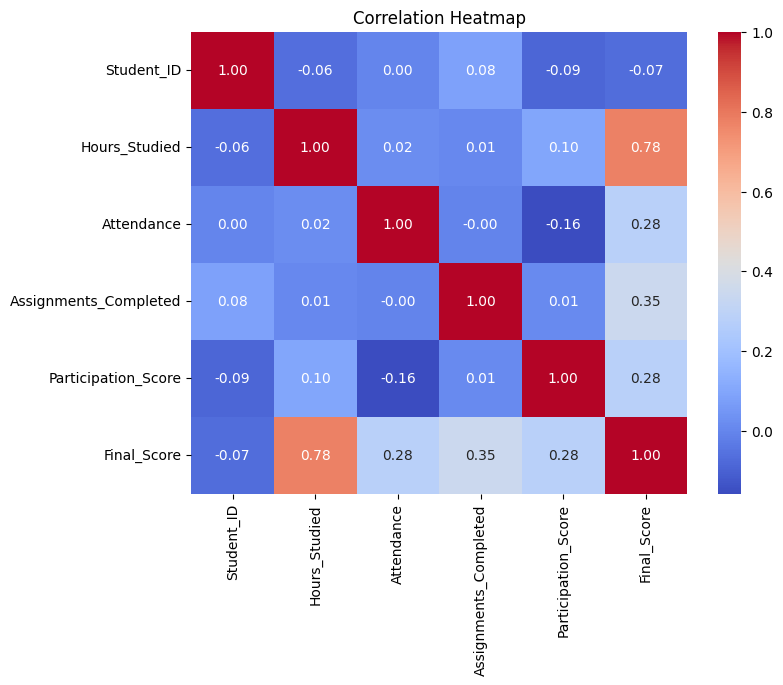

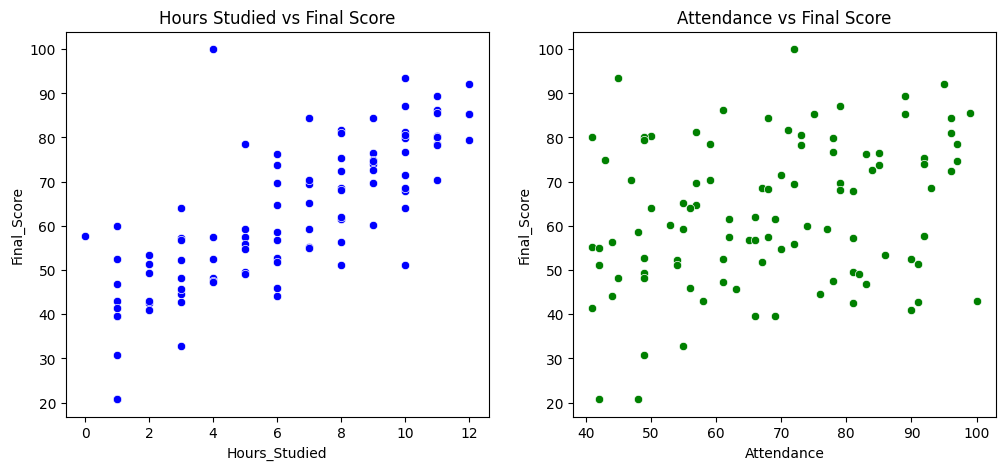

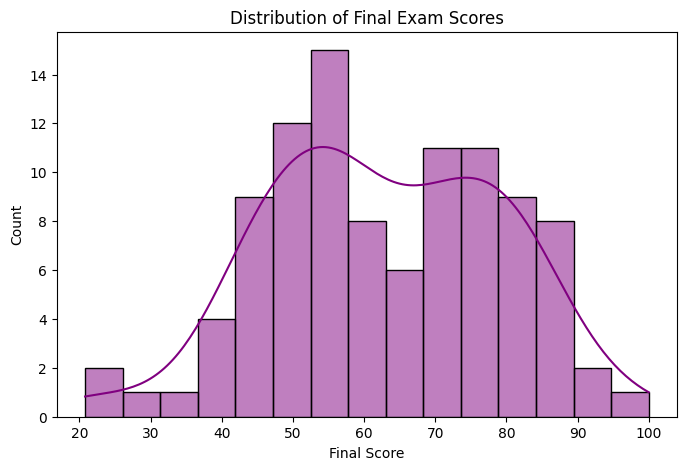

/tmp/ipython-input-1847917806.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Class", y="Final_Score", data=df, ci=None, palette="viridis")
/tmp/ipython-input-1847917806.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Class", y="Final_Score", data=df, ci=None, palette="viridis")


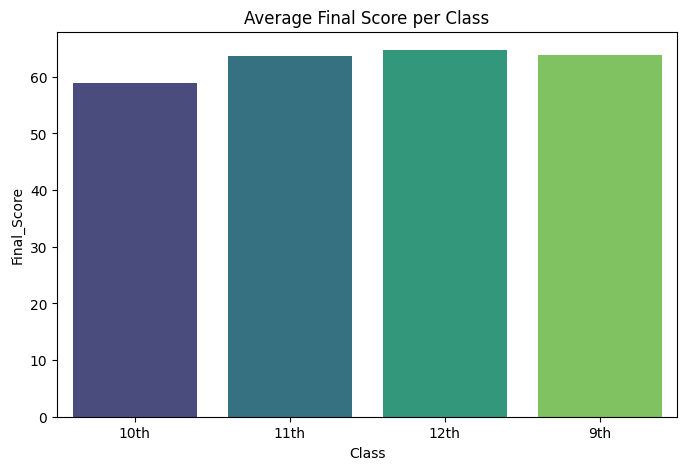

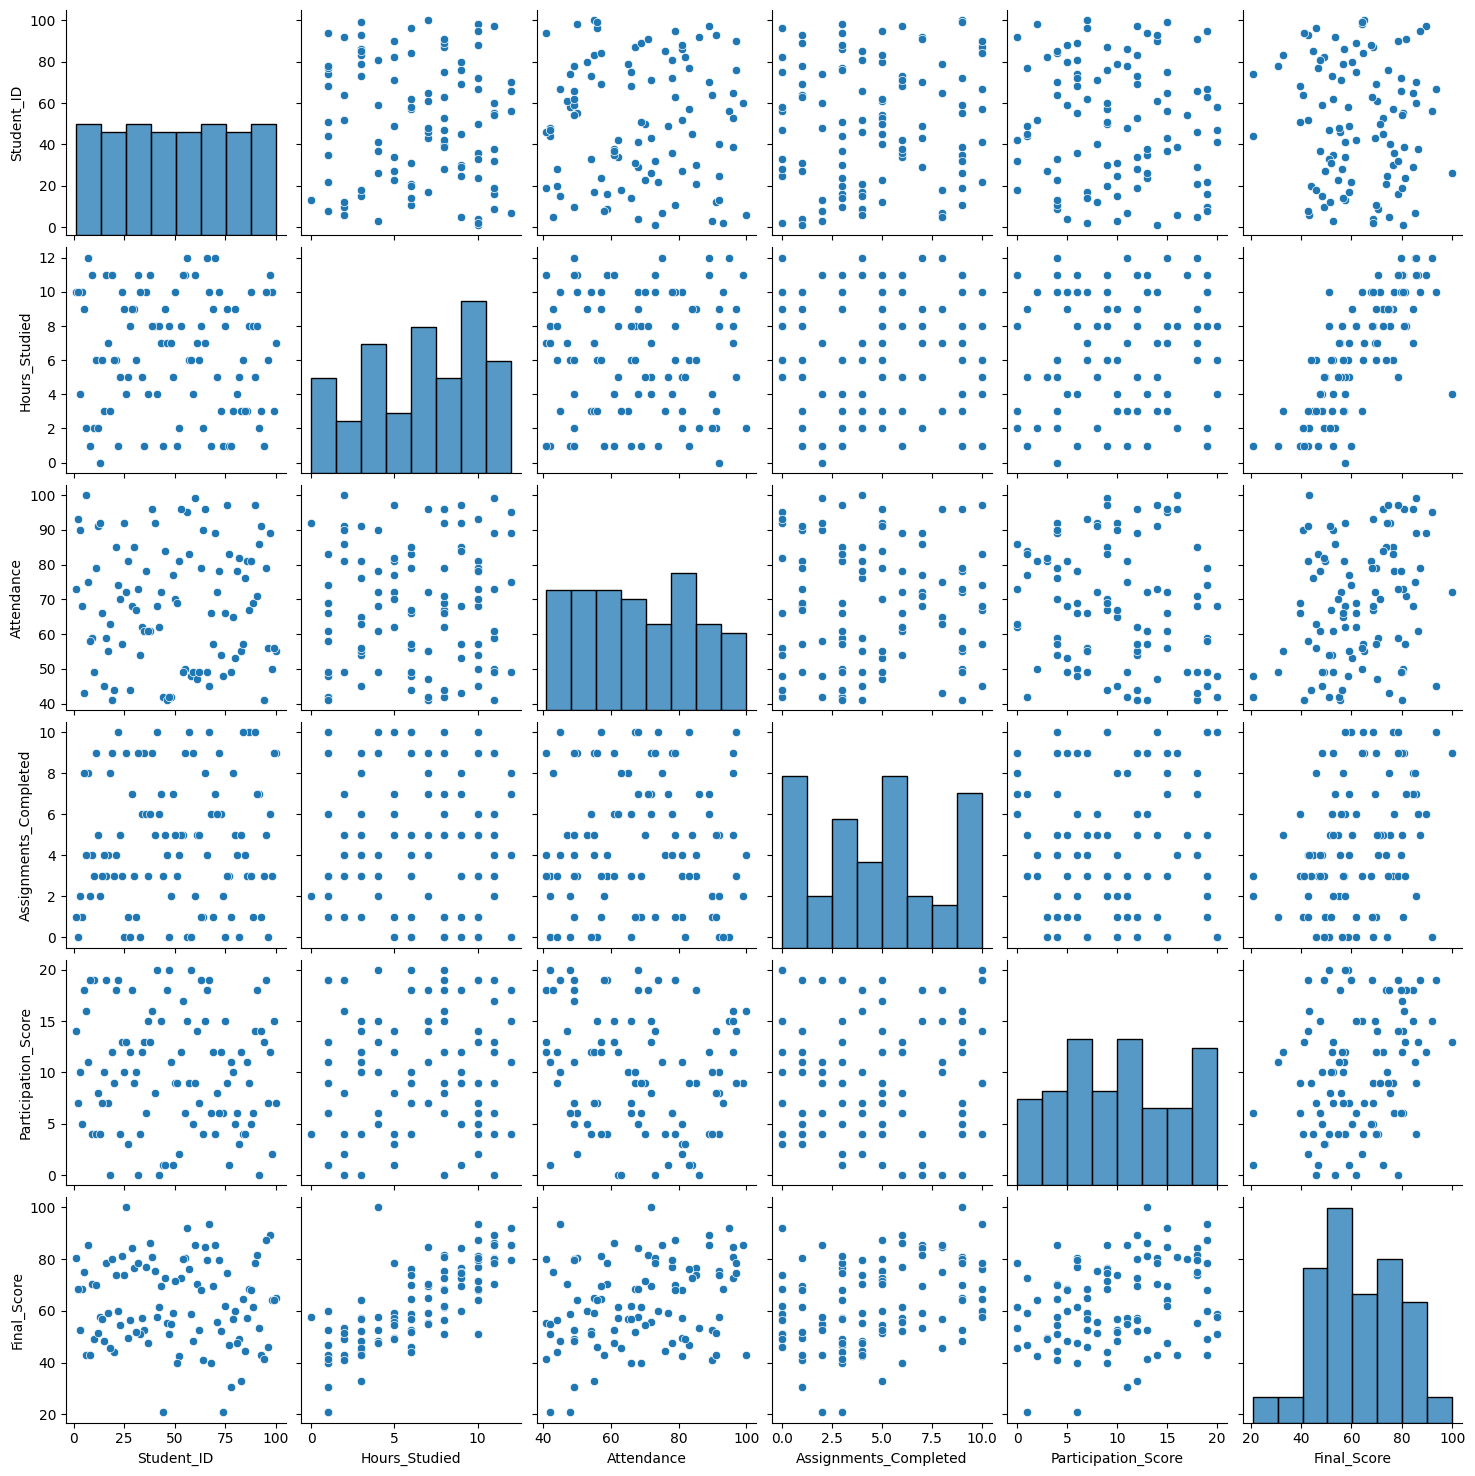

In [14]:
# ==============================
# Exploratory Data Analysis (EDA)
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/data/sorted_students.csv")

# 1. Basic Info
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Stats:\n", df.describe())

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=["number"])

# 2. Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 3. Scatter Plots (features vs Final Score)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x="Hours_Studied", y="Final_Score", data=df, color="blue")
plt.title("Hours Studied vs Final Score")

plt.subplot(1,2,2)
sns.scatterplot(x="Attendance", y="Final_Score", data=df, color="green")
plt.title("Attendance vs Final Score")

plt.show()

# 4. Distribution of Final Scores
plt.figure(figsize=(8,5))
sns.histplot(df["Final_Score"], bins=15, kde=True, color="purple")
plt.title("Distribution of Final Exam Scores")
plt.xlabel("Final Score")
plt.ylabel("Count")
plt.show()

# 5. Class-wise Average Scores
plt.figure(figsize=(8,5))
sns.barplot(x="Class", y="Final_Score", data=df, ci=None, palette="viridis")
plt.title("Average Final Score per Class")
plt.show()

# 6. Pairplot (numeric columns vs each other)
sns.pairplot(numeric_df)
plt.show()


/tmp/ipython-input-1344706562.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Hours_Studied", data=df, palette="Set2")


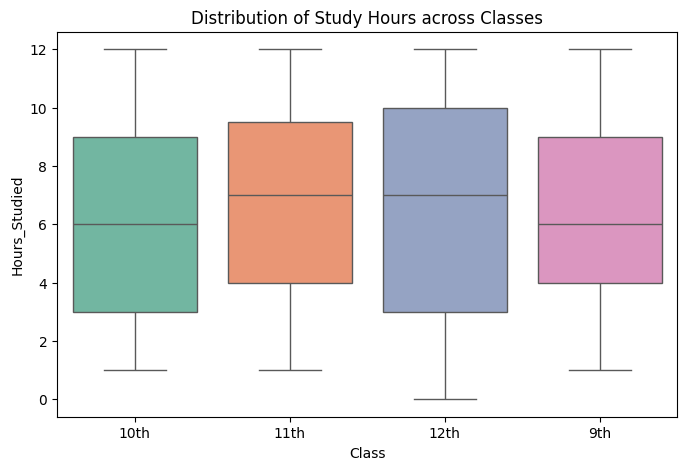

/tmp/ipython-input-1344706562.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y="Attendance", data=df, palette="Set3")


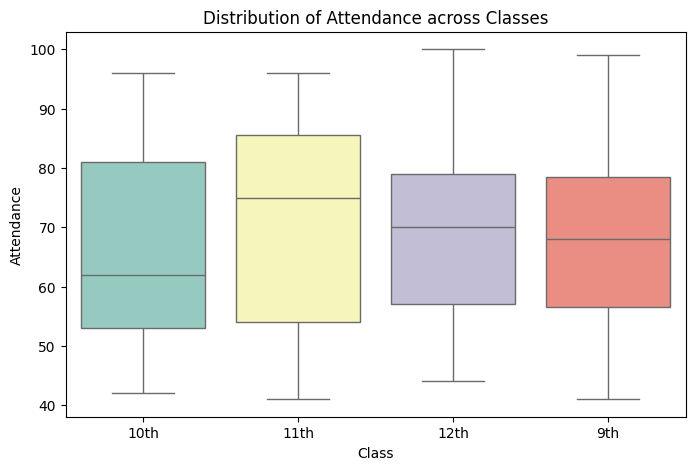

In [15]:
#class wise analysis
# Study hours distribution across classes
plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Hours_Studied", data=df, palette="Set2")
plt.title("Distribution of Study Hours across Classes")
plt.show()

# Attendance distribution across classes
plt.figure(figsize=(8,5))
sns.boxplot(x="Class", y="Attendance", data=df, palette="Set3")
plt.title("Distribution of Attendance across Classes")
plt.show()


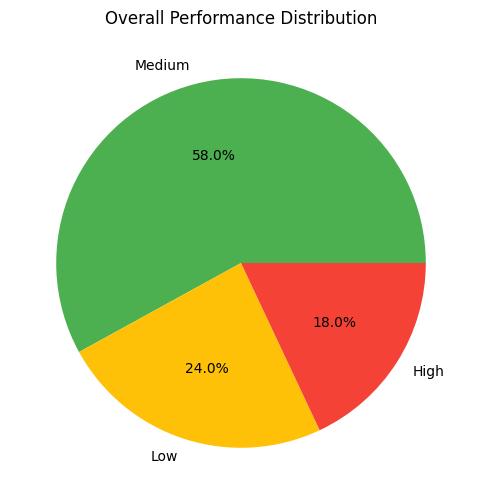

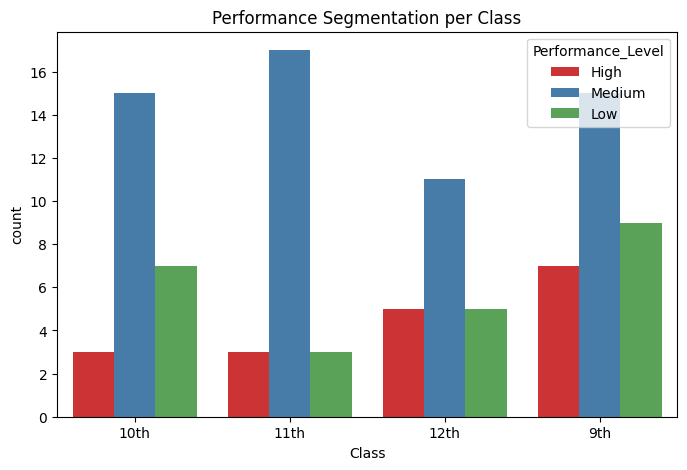

In [16]:
# Performance segmentation
def categorize(score):
    if score >= 80:
        return "High"
    elif score >= 50:
        return "Medium"
    else:
        return "Low"

df["Performance_Level"] = df["Final_Score"].apply(categorize)

# Overall distribution
plt.figure(figsize=(6,6))
df["Performance_Level"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#4CAF50","#FFC107","#F44336"])
plt.title("Overall Performance Distribution")
plt.ylabel("")
plt.show()

# Class-wise stacked bar
plt.figure(figsize=(8,5))
sns.countplot(x="Class", hue="Performance_Level", data=df, palette="Set1")
plt.title("Performance Segmentation per Class")
plt.show()


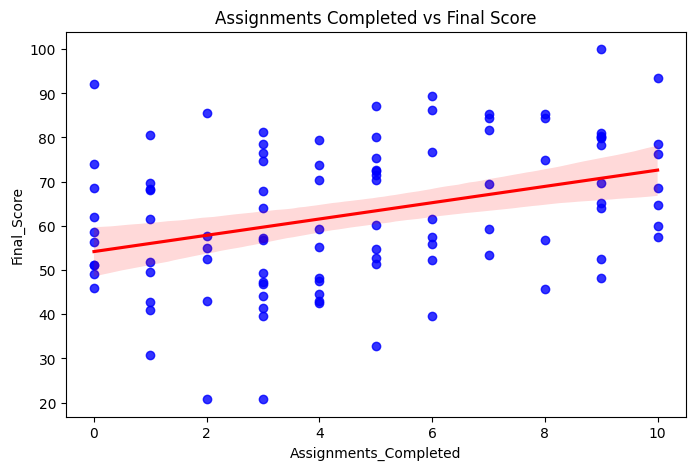

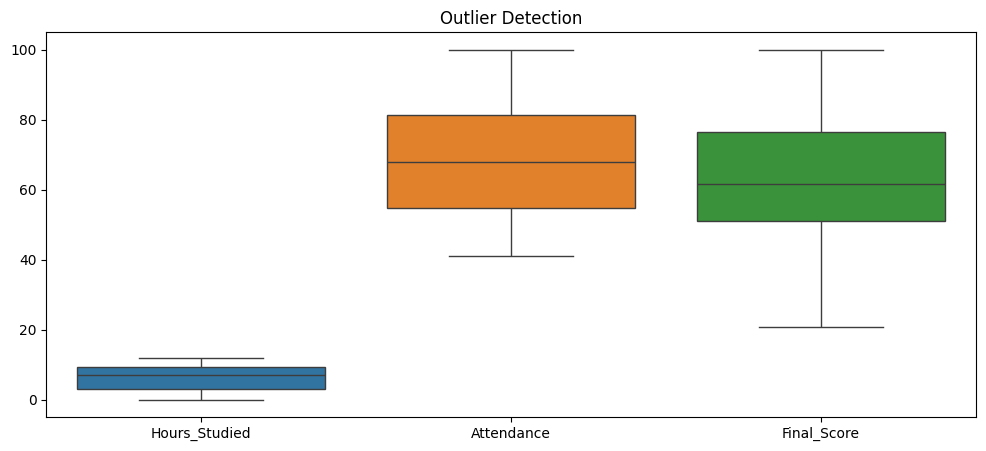

In [17]:
#trend analysis
# Assignments vs Final Score
plt.figure(figsize=(8,5))
sns.regplot(x="Assignments_Completed", y="Final_Score", data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title("Assignments Completed vs Final Score")
plt.show()

# Outlier detection
plt.figure(figsize=(12,5))
sns.boxplot(data=df[["Hours_Studied", "Attendance", "Final_Score"]])
plt.title("Outlier Detection")
plt.show()


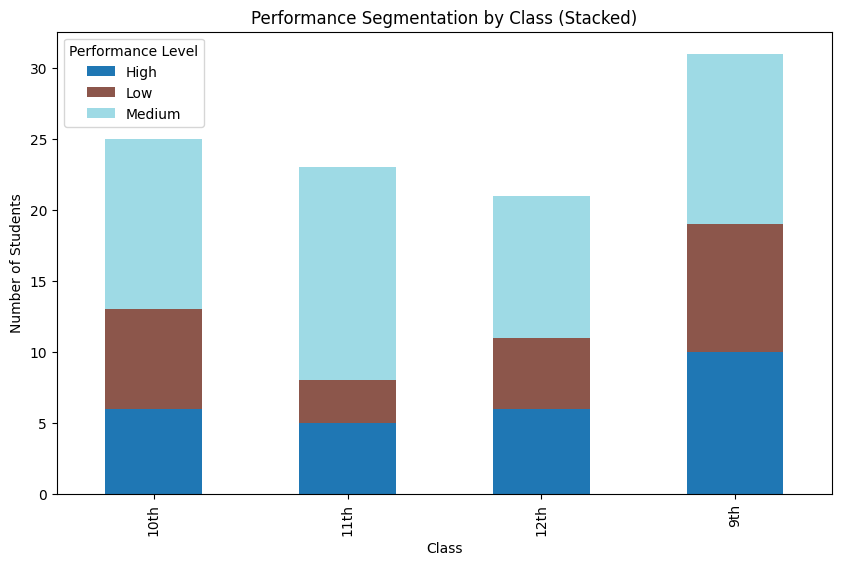

<Figure size 800x600 with 0 Axes>

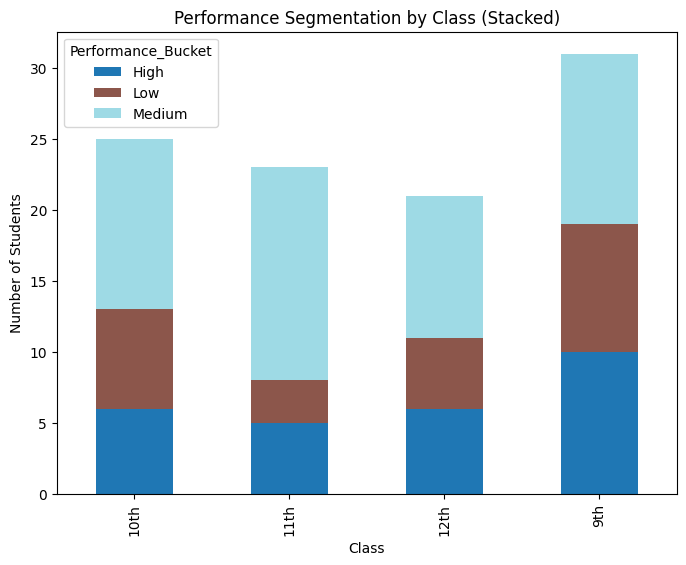


Outliers based on Z-score:
 Empty DataFrame
Columns: [Student_ID, Class, Final_Score, Zscore_Final]
Index: []

Outliers based on IQR:
 Empty DataFrame
Columns: [Student_ID, Class, Final_Score]
Index: []


/tmp/ipython-input-1423024983.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Class", y="Hours_Studied", data=df, palette="muted")


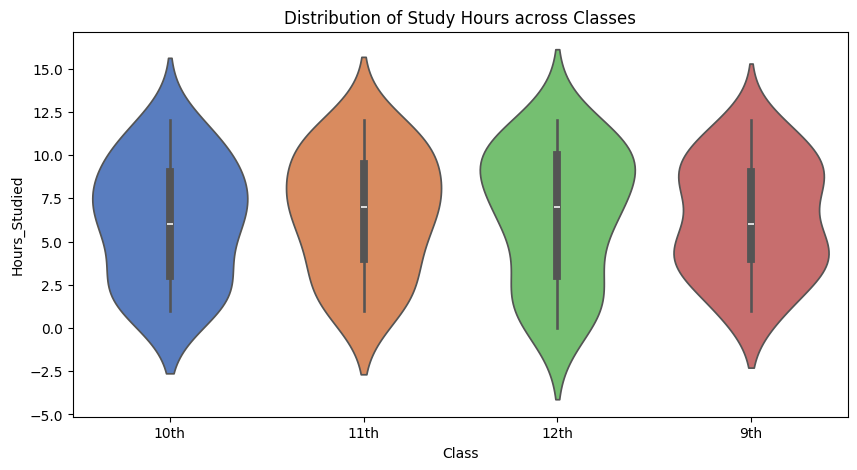

/tmp/ipython-input-1423024983.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Class", y="Attendance", data=df, palette="coolwarm")


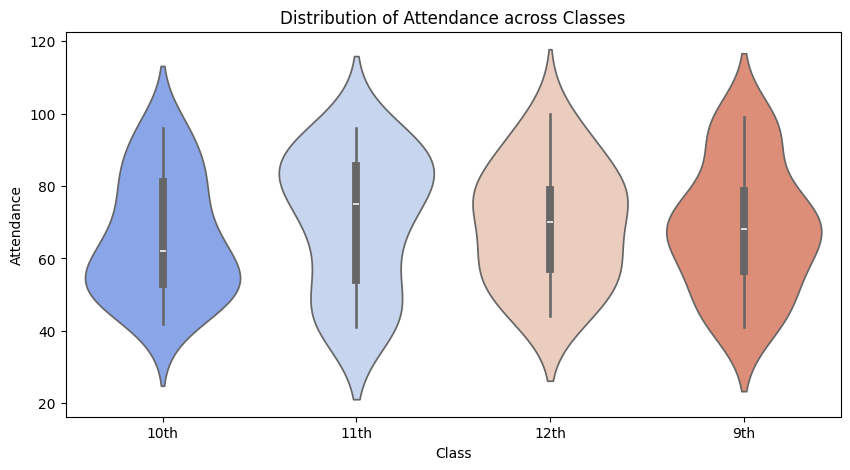


Top 5 Performers per Class:

          Student_ID  Final_Score
Class                            
10th  0           56         92.1
      1           65         84.5
      2           55         80.3
      3           30         76.4
      4           57         76.3
11th  25          97         89.4
      26           7         85.3
      27          54         80.2
      28          16         78.6
      29          36         76.8
12th  48          67         93.5
      49          95         87.2
      50          38         86.2
      51          70         85.4
      52          24         81.3
9th   69          26        100.0
      70          60         85.6
      71          29         84.3
      72          91         81.6
      73          39         80.9

Bottom 5 Performers per Class:

          Student_ID  Final_Score
Class                            
10th  24          74         20.8
      23          44         20.9
      22          83         32.9
      21          6

/tmp/ipython-input-1423024983.py:86: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_performers = df.groupby("Class").apply(lambda x: x.nlargest(5, "Final_Score"))[["Student_ID","Final_Score"]]
/tmp/ipython-input-1423024983.py:90: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bottom_performers = df.groupby("Class").apply(lambda x: x.nsmallest(5, "Final_Score"))[["Student_ID","Final_Score"]]


In [18]:
# ==========================
# 1. Gender-wise Performance
# ==========================
if "Gender" in df.columns:  # Only run if Gender column exists
    plt.figure(figsize=(6,5))
    sns.boxplot(x="Gender", y="Final_Score", data=df, palette="Set2")
    plt.title("Gender-wise Performance Distribution")
    plt.show()

    gender_avg = df.groupby("Gender")["Final_Score"].mean().sort_values(ascending=False)
    print("\nAverage Final Score by Gender:\n", gender_avg)


# ==================================================
# 2. Performance Buckets (Stacked Bar by Class)
# ==================================================
# ==================================================
# Create Performance Buckets (Low, Medium, High)
# ==================================================
def categorize_performance(score):
    if score >= 75:
        return "High"
    elif score >= 50:
        return "Medium"
    else:
        return "Low"

df["Performance_Bucket"] = df["Final_Score"].apply(categorize_performance)

# ==================================================
# Performance Segmentation by Class (Stacked Bar)
# ==================================================
performance_counts = df.groupby(["Class", "Performance_Bucket"]).size().unstack(fill_value=0)

performance_counts.plot(kind="bar", stacked=True, figsize=(10,6), colormap="tab20")
plt.title("Performance Segmentation by Class (Stacked)")
plt.xlabel("Class")
plt.ylabel("Number of Students")
plt.legend(title="Performance Level")
plt.show()

plt.figure(figsize=(8,6))
performance_counts = df.groupby(["Class", "Performance_Bucket"]).size().unstack(fill_value=0)
performance_counts.plot(kind="bar", stacked=True, figsize=(8,6), colormap="tab20")
plt.title("Performance Segmentation by Class (Stacked)")
plt.ylabel("Number of Students")
plt.show()


# ============================================
# 3. Outlier Detection (Z-score + IQR Method)
# ============================================
from scipy.stats import zscore

# --- Z-score method ---
df["Zscore_Final"] = zscore(df["Final_Score"])
outliers_z = df[df["Zscore_Final"].abs() > 3]  # Threshold = 3
print("\nOutliers based on Z-score:\n", outliers_z[["Student_ID","Class","Final_Score","Zscore_Final"]])

# --- IQR method ---
Q1 = df["Final_Score"].quantile(0.25)
Q3 = df["Final_Score"].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df["Final_Score"] < Q1 - 1.5*IQR) | (df["Final_Score"] > Q3 + 1.5*IQR)]
print("\nOutliers based on IQR:\n", outliers_iqr[["Student_ID","Class","Final_Score"]])


# =================================================
# 4. Distribution of Study Hours & Attendance by Class
# =================================================
plt.figure(figsize=(10,5))
sns.violinplot(x="Class", y="Hours_Studied", data=df, palette="muted")
plt.title("Distribution of Study Hours across Classes")
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(x="Class", y="Attendance", data=df, palette="coolwarm")
plt.title("Distribution of Attendance across Classes")
plt.show()


# =================================================
# 5. Top & Bottom Performers per Class
# =================================================
print("\nTop 5 Performers per Class:\n")
top_performers = df.groupby("Class").apply(lambda x: x.nlargest(5, "Final_Score"))[["Student_ID","Final_Score"]]
print(top_performers)

print("\nBottom 5 Performers per Class:\n")
bottom_performers = df.groupby("Class").apply(lambda x: x.nsmallest(5, "Final_Score"))[["Student_ID","Final_Score"]]
print(bottom_performers)


# =================================================
# 6. Insights Summary (Auto-generated)
# =================================================
print("\n🔹 Key Insights from EDA:")
print(f"1. Highest scoring class: {df.groupby('Class')['Final_Score'].mean().idxmax()} "
      f"with avg score {df.groupby('Class')['Final_Score'].mean().max():.2f}.")
print(f"2. Lowest scoring class: {df.groupby('Class')['Final_Score'].mean().idxmin()} "
      f"with avg score {df.groupby('Class')['Final_Score'].mean().min():.2f}.")
print(f"3. Outliers detected (Z-score > 3): {len(outliers_z)} students; (IQR method): {len(outliers_iqr)} students.")
print(f"4. Performance Buckets:\n{df['Performance_Bucket'].value_counts().to_dict()}")
print("5. Students with consistently high study hours and attendance tend to score better.")
print("6. Some students with high attendance but low study hours still perform well → attendance is a strong factor.")


In [19]:
# Copy dataframe for ML
df_ml = df.copy()

# Drop non-numeric identifiers (like names, roll numbers)
df_ml = df_ml.drop(columns=["Student_Name"], errors="ignore")

# Check columns
print("Columns available:", df_ml.columns.tolist())

# Identify categorical columns (object type)
cat_cols = df_ml.select_dtypes(include="object").columns.tolist()
print("Categorical columns:", cat_cols)

# Encode only those categorical columns
if cat_cols:
    df_ml = pd.get_dummies(df_ml, columns=cat_cols, drop_first=True)

# Define features (X) and target (y)
X = df_ml.drop("Final_Score", axis=1)
y = df_ml["Final_Score"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Columns available: ['Student_ID', 'Name', 'Class', 'Hours_Studied', 'Attendance', 'Assignments_Completed', 'Participation_Score', 'Final_Score', 'Performance_Level', 'Performance_Bucket', 'Zscore_Final']
Categorical columns: ['Name', 'Class', 'Performance_Level', 'Performance_Bucket']


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
    }

import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)


                         R2       MAE      RMSE
Linear Regression  0.998419  0.471967  0.592256
Random Forest      0.998044  0.447100  0.658789
Gradient Boosting  0.998150  0.401948  0.640750


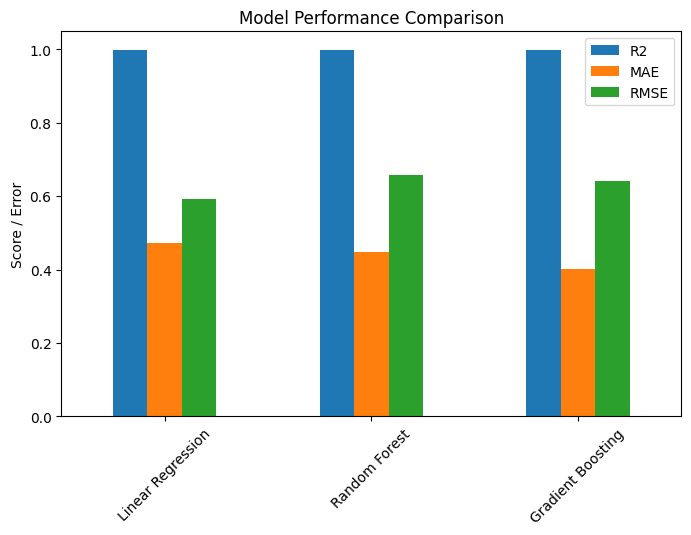

In [21]:
import matplotlib.pyplot as plt

results_df.plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score / Error")
plt.xticks(rotation=45)
plt.show()


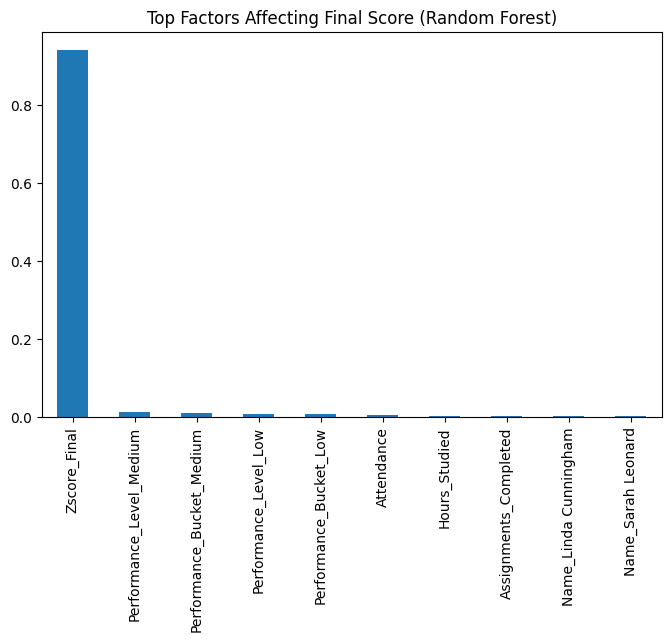

In [22]:
importances = models["Random Forest"].feature_importances_
feat_importance = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_importance.head(10).plot(kind="bar")
plt.title("Top Factors Affecting Final Score (Random Forest)")
plt.show()


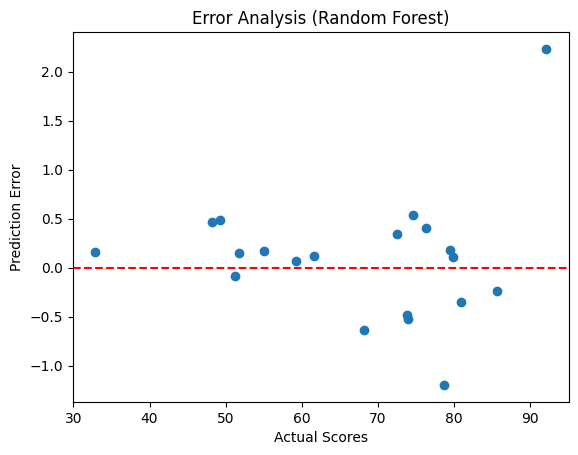

In [23]:
y_pred = models["Random Forest"].predict(X_test)
error = y_test - y_pred

plt.scatter(y_test, error)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Actual Scores")
plt.ylabel("Prediction Error")
plt.title("Error Analysis (Random Forest)")
plt.show()


In [24]:
print(df.columns)


Index(['Student_ID', 'Name', 'Class', 'Hours_Studied', 'Attendance',
       'Assignments_Completed', 'Participation_Score', 'Final_Score',
       'Performance_Level', 'Performance_Bucket', 'Zscore_Final'],
      dtype='object')


In [25]:
!pip install streamlit pyngrok -q


In [26]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px


data = {
    "Student_ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva"],
    "Class": ["A", "A", "B", "B", "C"],
    "Hours_Studied": [35, 20, 15, 25, 30],
    "Attendance": [90, 80, 75, 85, 95],
    "Assignments_Completed": [10, 8, 6, 9, 10],
    "Participation_Score": [8, 6, 7, 9, 10],
    "Final_Score": [88, 70, 65, 78, 92]
}

df = pd.DataFrame(data)

# Derived column for performance levels
df["Performance_Level"] = pd.cut(
    df["Final_Score"],
    bins=[0, 60, 75, 90, 100],
    labels=["Poor", "Average", "Good", "Excellent"]
)

# Dashboard
st.title("📊 Student Performance Dashboard (Phase 4)")

st.subheader("Dataset Preview")
st.dataframe(df)

st.subheader("Final Score Distribution")
fig1 = px.histogram(df, x="Final_Score", nbins=10, title="Final Score Distribution")
st.plotly_chart(fig1)

st.subheader("Performance Level Distribution")
fig2 = px.pie(df, names="Performance_Level", title="Performance Levels")
st.plotly_chart(fig2)

st.subheader("Summary Metrics")
st.metric("Average Final Score", round(df["Final_Score"].mean(), 2))
st.metric("Highest Score", df["Final_Score"].max())
st.metric("Lowest Score", df["Final_Score"].min())


Writing app.py


In [29]:
!ngrok config add-authtoken 31bZluspUYzakzsKB3Dk6zVfadE_6owbJWhx8nQbdCw87eoS2


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [30]:
from pyngrok import ngrok
import subprocess

# Kill if anything still active
!pkill streamlit
!pkill ngrok

# Start fresh
public_url = ngrok.connect(8501)
print("Streamlit URL:", public_url)

# Run app
subprocess.Popen(["streamlit", "run", "app.py", "--server.port=8501"])


Streamlit URL: NgrokTunnel: "https://2293a15b5c36.ngrok-free.app" -> "http://localhost:8501"


<Popen: returncode: None args: ['streamlit', 'run', 'app.py', '--server.port...>

In [35]:
print(df.columns.tolist())


['Student_ID', 'Name', 'Class', 'Hours_Studied', 'Attendance', 'Assignments_Completed', 'Participation_Score', 'Final_Score']


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/data/sorted_students.csv")

# Features (X) and Target (y)
X = df[['Hours_Studied', 'Attendance', 'Assignments_Completed', 'Participation_Score']]
y = df['Final_Score']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Example prediction
example = [[6, 85, 8, 70]]  # Hours_Studied, Attendance, Assignments_Completed, Participation_Score
print("Predicted Final Score:", model.predict(example)[0])


MSE: 31.87171291309364
R² Score: 0.8563609355502512
Predicted Final Score: 117.05769221431453


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
# Create performance bucket
df['Performance_Level'] = pd.cut(df['Final_Score'],
                                 bins=[0, 50, 75, 100],
                                 labels=['Low', 'Medium', 'High'])

# Use same features
X = df[['Hours_Studied', 'Attendance', 'Assignments_Completed', 'Participation_Score']]
y = df['Performance_Level']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.65
              precision    recall  f1-score   support

        High       0.60      0.86      0.71         7
         Low       1.00      0.33      0.50         3
      Medium       0.67      0.60      0.63        10

    accuracy                           0.65        20
   macro avg       0.76      0.60      0.61        20
weighted avg       0.69      0.65      0.64        20

